In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('../../Datasets/Lynx_Hare/data.csv', usecols=['DATE', 'HARE', 'LYNX'])
print(df)

    DATE   HARE   LYNX
0   1845  19.58  30.09
1   1846  19.60  45.15
2   1847  19.61  49.15
3   1848  11.99  39.52
4   1849  28.04  21.23
..   ...    ...    ...
86  1931  19.52   8.31
87  1932  82.11  16.01
88  1933  89.76  24.82
89  1934  81.66  29.70
90  1935  15.76  35.40

[91 rows x 3 columns]


In [23]:
for col in ['HARE', 'LYNX']:
    df[f'{col}_lag1'] = df[col].shift(1)

df['Lynx_on_Hare'] = df['LYNX_lag1'] * df['HARE']
df.dropna(inplace=True)
print(df)

    DATE   HARE   LYNX  HARE_lag1  LYNX_lag1  Lynx_on_Hare
1   1846  19.60  45.15      19.58      30.09      589.7640
2   1847  19.61  49.15      19.60      45.15      885.3915
3   1848  11.99  39.52      19.61      49.15      589.3085
4   1849  28.04  21.23      11.99      39.52     1108.1408
5   1850  58.00   8.42      28.04      21.23     1231.3400
..   ...    ...    ...        ...        ...           ...
86  1931  19.52   8.31       4.23       6.98      136.2496
87  1932  82.11  16.01      19.52       8.31      682.3341
88  1933  89.76  24.82      82.11      16.01     1437.0576
89  1934  81.66  29.70      89.76      24.82     2026.8012
90  1935  15.76  35.40      81.66      29.70      468.0720

[90 rows x 6 columns]


In [24]:
X = df.drop(['DATE', 'HARE', 'LYNX'], axis=1)
y = df[['HARE', 'LYNX']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y)

    HARE_lag1  LYNX_lag1  Lynx_on_Hare
50      70.40      46.00     3947.2600
63      23.37       6.30      135.7020
74       4.50       6.82       76.4522
70      40.97      43.36     1081.8320
77      69.63       9.94      772.7356
..        ...        ...           ...
21      85.81      60.78     2516.8998
61      57.78      63.51     1821.4668
72      12.59      30.36      150.8892
15      12.64      13.69      294.1981
52      56.69      46.43      770.2737

[72 rows x 3 columns]
     HARE   LYNX
1   19.60  45.15
2   19.61  49.15
3   11.99  39.52
4   28.04  21.23
5   58.00   8.42
..    ...    ...
86  19.52   8.31
87  82.11  16.01
88  89.76  24.82
89  81.66  29.70
90  15.76  35.40

[90 rows x 2 columns]


In [25]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1, warm_start=True, random_state=42)

Epoch 1/200, Training MSE: 1.3343, Test MSE: 2.1035
Epoch 2/200, Training MSE: 1.2974, Test MSE: 2.0407
Epoch 3/200, Training MSE: 1.2613, Test MSE: 1.9792
Epoch 4/200, Training MSE: 1.2262, Test MSE: 1.9191
Epoch 5/200, Training MSE: 1.1918, Test MSE: 1.8606
Epoch 6/200, Training MSE: 1.1581, Test MSE: 1.8033
Epoch 7/200, Training MSE: 1.1253, Test MSE: 1.7473
Epoch 8/200, Training MSE: 1.0933, Test MSE: 1.6931
Epoch 9/200, Training MSE: 1.0621, Test MSE: 1.6402
Epoch 10/200, Training MSE: 1.0317, Test MSE: 1.5884
Epoch 11/200, Training MSE: 1.0020, Test MSE: 1.5374
Epoch 12/200, Training MSE: 0.9730, Test MSE: 1.4880
Epoch 13/200, Training MSE: 0.9447, Test MSE: 1.4400
Epoch 14/200, Training MSE: 0.9171, Test MSE: 1.3930
Epoch 15/200, Training MSE: 0.8903, Test MSE: 1.3469
Epoch 16/200, Training MSE: 0.8643, Test MSE: 1.3022
Epoch 17/200, Training MSE: 0.8390, Test MSE: 1.2587
Epoch 18/200, Training MSE: 0.8146, Test MSE: 1.2165
Epoch 19/200, Training MSE: 0.7909, Test MSE: 1.1754
Ep

Epoch 34/200, Training MSE: 0.5227, Test MSE: 0.7059
Epoch 35/200, Training MSE: 0.5104, Test MSE: 0.6843
Epoch 36/200, Training MSE: 0.4987, Test MSE: 0.6635
Epoch 37/200, Training MSE: 0.4875, Test MSE: 0.6441
Epoch 38/200, Training MSE: 0.4769, Test MSE: 0.6262
Epoch 39/200, Training MSE: 0.4668, Test MSE: 0.6104
Epoch 40/200, Training MSE: 0.4571, Test MSE: 0.5954
Epoch 41/200, Training MSE: 0.4479, Test MSE: 0.5817
Epoch 42/200, Training MSE: 0.4391, Test MSE: 0.5689
Epoch 43/200, Training MSE: 0.4307, Test MSE: 0.5569
Epoch 44/200, Training MSE: 0.4225, Test MSE: 0.5461
Epoch 45/200, Training MSE: 0.4147, Test MSE: 0.5356
Epoch 46/200, Training MSE: 0.4071, Test MSE: 0.5255
Epoch 47/200, Training MSE: 0.3998, Test MSE: 0.5164


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 48/200, Training MSE: 0.3928, Test MSE: 0.5079
Epoch 49/200, Training MSE: 0.3860, Test MSE: 0.4999
Epoch 50/200, Training MSE: 0.3795, Test MSE: 0.4925
Epoch 51/200, Training MSE: 0.3732, Test MSE: 0.4860
Epoch 52/200, Training MSE: 0.3672, Test MSE: 0.4794
Epoch 53/200, Training MSE: 0.3614, Test MSE: 0.4734
Epoch 54/200, Training MSE: 0.3558, Test MSE: 0.4673
Epoch 55/200, Training MSE: 0.3505, Test MSE: 0.4614
Epoch 56/200, Training MSE: 0.3453, Test MSE: 0.4557
Epoch 57/200, Training MSE: 0.3405, Test MSE: 0.4503
Epoch 58/200, Training MSE: 0.3358, Test MSE: 0.4449
Epoch 59/200, Training MSE: 0.3314, Test MSE: 0.4395
Epoch 60/200, Training MSE: 0.3272, Test MSE: 0.4347
Epoch 61/200, Training MSE: 0.3230, Test MSE: 0.4301
Epoch 62/200, Training MSE: 0.3191, Test MSE: 0.4257
Epoch 63/200, Training MSE: 0.3153, Test MSE: 0.4218
Epoch 64/200, Training MSE: 0.3117, Test MSE: 0.4183
Epoch 65/200, Training MSE: 0.3082, Test MSE: 0.4149
Epoch 66/200, Training MSE: 0.3049, Test MSE: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 125/200, Training MSE: 0.1926, Test MSE: 0.3286
Epoch 126/200, Training MSE: 0.1916, Test MSE: 0.3275
Epoch 127/200, Training MSE: 0.1906, Test MSE: 0.3282
Epoch 128/200, Training MSE: 0.1896, Test MSE: 0.3245
Epoch 129/200, Training MSE: 0.1887, Test MSE: 0.3266
Epoch 130/200, Training MSE: 0.1878, Test MSE: 0.3223
Epoch 131/200, Training MSE: 0.1870, Test MSE: 0.3243
Epoch 132/200, Training MSE: 0.1861, Test MSE: 0.3212
Epoch 133/200, Training MSE: 0.1853, Test MSE: 0.3225
Epoch 134/200, Training MSE: 0.1845, Test MSE: 0.3192
Epoch 135/200, Training MSE: 0.1836, Test MSE: 0.3211
Epoch 136/200, Training MSE: 0.1828, Test MSE: 0.3178
Epoch 137/200, Training MSE: 0.1820, Test MSE: 0.3183
Epoch 138/200, Training MSE: 0.1813, Test MSE: 0.3171
Epoch 139/200, Training MSE: 0.1805, Test MSE: 0.3173
Epoch 140/200, Training MSE: 0.1798, Test MSE: 0.3162
Epoch 141/200, Training MSE: 0.1791, Test MSE: 0.3166
Epoch 142/200, Training MSE: 0.1785, Test MSE: 0.3134
Epoch 143/200, Training MSE:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

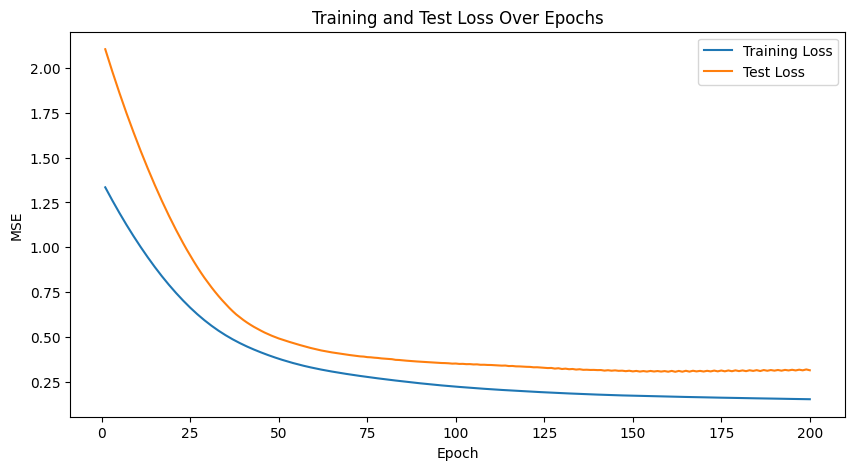

Final Test MSE: 0.31534193115344117


In [26]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.fit(X_train_scaled, y_train_scaled)
    
    # Predict on training and testing set
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate MSE for both training and testing sets
    train_mse = mean_squared_error(y_train_scaled, y_train_pred)
    test_mse = mean_squared_error(y_test_scaled, y_test_pred)
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')

In [27]:
df = pd.read_csv('../../Datasets/study_373/top_5_373.csv', usecols=['DATE', '46670', '46982', '46504', '46571', '46888'])
print(df)

           DATE  46670  46982  46504  46571  46888
0    2008-06-08    1.0    2.0    1.0    1.0    2.0
1    2008-07-11    1.0    3.0    1.0    1.0    2.0
2    2008-09-14    2.0    6.0    2.0    1.0    1.0
3    2008-09-16    2.0    1.0    1.0    1.0    3.0
4    2008-09-22    2.0    4.0    1.0    1.0    2.0
..          ...    ...    ...    ...    ...    ...
388  2012-10-18   10.0    6.0    1.0    1.0    2.0
389  2012-10-22    8.0    6.0    1.0    1.0    3.0
390  2012-10-28    3.0    1.0    1.0    1.0    2.0
391  2012-11-08    2.0    7.0    1.0    1.0    2.0
392  2012-11-09    2.0    1.0    1.0    1.0    1.0

[393 rows x 6 columns]


In [28]:
for col in ['46670', '46982', '46504', '46571', '46888']:
    df[f'{col}_lag1'] = df[col].shift(1)

# 46670  Nyctereutes procyonoides	common raccoon dog  -> Rodents, Japanese Hare
# 46982  Sus scrofa				    wild boar           -> Rodents, Japanese Hare
# 46504  Lepus brachyurus			Japanese Hare
# 46571  Meles anakuma			    Japanese Badger     -> Rodents
# 46888  Rodentia	

# 46670 Nyctereutes procyonoides	common raccoon dog  -> Rodents, Japanese Hare
df['46670_on_46888'] = df['46670_lag1'] * df['46888']
df['46670_on_46504'] = df['46670_lag1'] * df['46504']

# 46982 Sus scrofa				    wild boar           -> Rodents, Japanese Hare
df['46982_on_46888'] = df['46982_lag1'] * df['46888']
df['46982_on_46504'] = df['46982_lag1'] * df['46504']

# 46571 Meles anakuma			    Japanese Badger     -> Rodents
df['46571_on_46888'] = df['46571_lag1'] * df['46888']

df.dropna(inplace=True)
print(df)

           DATE  46670  46982  46504  46571  46888  46670_lag1  46982_lag1  \
1    2008-07-11    1.0    3.0    1.0    1.0    2.0         1.0         2.0   
2    2008-09-14    2.0    6.0    2.0    1.0    1.0         1.0         3.0   
3    2008-09-16    2.0    1.0    1.0    1.0    3.0         2.0         6.0   
4    2008-09-22    2.0    4.0    1.0    1.0    2.0         2.0         1.0   
5    2008-09-25    2.0    4.0    1.0    1.0    3.0         2.0         4.0   
..          ...    ...    ...    ...    ...    ...         ...         ...   
388  2012-10-18   10.0    6.0    1.0    1.0    2.0        12.0         9.0   
389  2012-10-22    8.0    6.0    1.0    1.0    3.0        10.0         6.0   
390  2012-10-28    3.0    1.0    1.0    1.0    2.0         8.0         6.0   
391  2012-11-08    2.0    7.0    1.0    1.0    2.0         3.0         1.0   
392  2012-11-09    2.0    1.0    1.0    1.0    1.0         2.0         7.0   

     46504_lag1  46571_lag1  46888_lag1  46670_on_46888  46670_

In [29]:
X = df.drop(['DATE', '46670', '46982', '46504', '46571', '46888'], axis=1)
y = df[['46670', '46982', '46504', '46571', '46888']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y)

     46670_lag1  46982_lag1  46504_lag1  46571_lag1  46888_lag1  \
259         9.0         2.0         7.0         2.0         1.0   
183         1.0         3.0         6.0        10.0         3.0   
173         2.0         2.0         4.0         2.0         1.0   
64          4.0         1.0        10.0         5.0         1.0   
341         6.0         3.0         2.0         5.0         1.0   
..          ...         ...         ...         ...         ...   
72          1.0         7.0         9.0         1.0         1.0   
107        11.0        10.0         2.0         4.0         7.0   
271         9.0         9.0         4.0         3.0         2.0   
349        12.0         7.0         1.0         2.0         4.0   
103        10.0        13.0         5.0         2.0         1.0   

     46670_on_46888  46670_on_46504  46982_on_46888  46982_on_46504  \
259             9.0             9.0             2.0             2.0   
183             7.0             3.0            21.0  

In [30]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1, warm_start=True, random_state=42)

Epoch 1/200, Training MSE: 1.1757, Test MSE: 1.3518
Epoch 2/200, Training MSE: 1.1221, Test MSE: 1.2880
Epoch 3/200, Training MSE: 1.0723, Test MSE: 1.2288
Epoch 4/200, Training MSE: 1.0262, Test MSE: 1.1745
Epoch 5/200, Training MSE: 0.9838, Test MSE: 1.1248
Epoch 6/200, Training MSE: 0.9445, Test MSE: 1.0791
Epoch 7/200, Training MSE: 0.9082, Test MSE: 1.0372
Epoch 8/200, Training MSE: 0.8747, Test MSE: 0.9991
Epoch 9/200, Training MSE: 0.8439, Test MSE: 0.9640
Epoch 10/200, Training MSE: 0.8155, Test MSE: 0.9321
Epoch 11/200, Training MSE: 0.7894, Test MSE: 0.9029
Epoch 12/200, Training MSE: 0.7655, Test MSE: 0.8763
Epoch 13/200, Training MSE: 0.7435, Test MSE: 0.8521
Epoch 14/200, Training MSE: 0.7233, Test MSE: 0.8302
Epoch 15/200, Training MSE: 0.7048, Test MSE: 0.8103
Epoch 16/200, Training MSE: 0.6878, Test MSE: 0.7920
Epoch 17/200, Training MSE: 0.6723, Test MSE: 0.7753
Epoch 18/200, Training MSE: 0.6582, Test MSE: 0.7606
Epoch 19/200, Training MSE: 0.6451, Test MSE: 0.7473
Ep

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 32/200, Training MSE: 0.5417, Test MSE: 0.6484
Epoch 33/200, Training MSE: 0.5366, Test MSE: 0.6441
Epoch 34/200, Training MSE: 0.5317, Test MSE: 0.6395
Epoch 35/200, Training MSE: 0.5271, Test MSE: 0.6354
Epoch 36/200, Training MSE: 0.5227, Test MSE: 0.6318
Epoch 37/200, Training MSE: 0.5185, Test MSE: 0.6288
Epoch 38/200, Training MSE: 0.5145, Test MSE: 0.6260
Epoch 39/200, Training MSE: 0.5107, Test MSE: 0.6238
Epoch 40/200, Training MSE: 0.5070, Test MSE: 0.6213
Epoch 41/200, Training MSE: 0.5035, Test MSE: 0.6195
Epoch 42/200, Training MSE: 0.5001, Test MSE: 0.6174
Epoch 43/200, Training MSE: 0.4968, Test MSE: 0.6156
Epoch 44/200, Training MSE: 0.4936, Test MSE: 0.6135
Epoch 45/200, Training MSE: 0.4906, Test MSE: 0.6120
Epoch 46/200, Training MSE: 0.4875, Test MSE: 0.6097
Epoch 47/200, Training MSE: 0.4847, Test MSE: 0.6083
Epoch 48/200, Training MSE: 0.4819, Test MSE: 0.6067
Epoch 49/200, Training MSE: 0.4793, Test MSE: 0.6058
Epoch 50/200, Training MSE: 0.4767, Test MSE: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 78/200, Training MSE: 0.4298, Test MSE: 0.5887
Epoch 79/200, Training MSE: 0.4286, Test MSE: 0.5894
Epoch 80/200, Training MSE: 0.4276, Test MSE: 0.5890
Epoch 81/200, Training MSE: 0.4263, Test MSE: 0.5900
Epoch 82/200, Training MSE: 0.4253, Test MSE: 0.5889
Epoch 83/200, Training MSE: 0.4241, Test MSE: 0.5899
Epoch 84/200, Training MSE: 0.4231, Test MSE: 0.5885
Epoch 85/200, Training MSE: 0.4219, Test MSE: 0.5899
Epoch 86/200, Training MSE: 0.4209, Test MSE: 0.5886
Epoch 87/200, Training MSE: 0.4198, Test MSE: 0.5898
Epoch 88/200, Training MSE: 0.4189, Test MSE: 0.5885
Epoch 89/200, Training MSE: 0.4178, Test MSE: 0.5904
Epoch 90/200, Training MSE: 0.4168, Test MSE: 0.5884
Epoch 91/200, Training MSE: 0.4158, Test MSE: 0.5912
Epoch 92/200, Training MSE: 0.4149, Test MSE: 0.5893
Epoch 93/200, Training MSE: 0.4139, Test MSE: 0.5914
Epoch 94/200, Training MSE: 0.4130, Test MSE: 0.5896
Epoch 95/200, Training MSE: 0.4121, Test MSE: 0.5923
Epoch 96/200, Training MSE: 0.4112, Test MSE: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 125/200, Training MSE: 0.3891, Test MSE: 0.5988
Epoch 126/200, Training MSE: 0.3884, Test MSE: 0.5964
Epoch 127/200, Training MSE: 0.3877, Test MSE: 0.5995
Epoch 128/200, Training MSE: 0.3869, Test MSE: 0.5965
Epoch 129/200, Training MSE: 0.3862, Test MSE: 0.5993
Epoch 130/200, Training MSE: 0.3855, Test MSE: 0.5964
Epoch 131/200, Training MSE: 0.3850, Test MSE: 0.5996
Epoch 132/200, Training MSE: 0.3842, Test MSE: 0.5968
Epoch 133/200, Training MSE: 0.3836, Test MSE: 0.6001
Epoch 134/200, Training MSE: 0.3829, Test MSE: 0.5973
Epoch 135/200, Training MSE: 0.3823, Test MSE: 0.6008
Epoch 136/200, Training MSE: 0.3816, Test MSE: 0.5974
Epoch 137/200, Training MSE: 0.3811, Test MSE: 0.6011
Epoch 138/200, Training MSE: 0.3803, Test MSE: 0.5986
Epoch 139/200, Training MSE: 0.3797, Test MSE: 0.6015
Epoch 140/200, Training MSE: 0.3791, Test MSE: 0.5992
Epoch 141/200, Training MSE: 0.3786, Test MSE: 0.6022
Epoch 142/200, Training MSE: 0.3780, Test MSE: 0.6006
Epoch 143/200, Training MSE:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 176/200, Training MSE: 0.3598, Test MSE: 0.6120
Epoch 177/200, Training MSE: 0.3593, Test MSE: 0.6159
Epoch 178/200, Training MSE: 0.3587, Test MSE: 0.6124
Epoch 179/200, Training MSE: 0.3583, Test MSE: 0.6171
Epoch 180/200, Training MSE: 0.3577, Test MSE: 0.6141
Epoch 181/200, Training MSE: 0.3574, Test MSE: 0.6182
Epoch 182/200, Training MSE: 0.3568, Test MSE: 0.6146
Epoch 183/200, Training MSE: 0.3564, Test MSE: 0.6183
Epoch 184/200, Training MSE: 0.3559, Test MSE: 0.6147
Epoch 185/200, Training MSE: 0.3554, Test MSE: 0.6191
Epoch 186/200, Training MSE: 0.3549, Test MSE: 0.6170
Epoch 187/200, Training MSE: 0.3543, Test MSE: 0.6197
Epoch 188/200, Training MSE: 0.3539, Test MSE: 0.6172
Epoch 189/200, Training MSE: 0.3533, Test MSE: 0.6205
Epoch 190/200, Training MSE: 0.3528, Test MSE: 0.6174
Epoch 191/200, Training MSE: 0.3524, Test MSE: 0.6225
Epoch 192/200, Training MSE: 0.3519, Test MSE: 0.6189
Epoch 193/200, Training MSE: 0.3514, Test MSE: 0.6236
Epoch 194/200, Training MSE:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

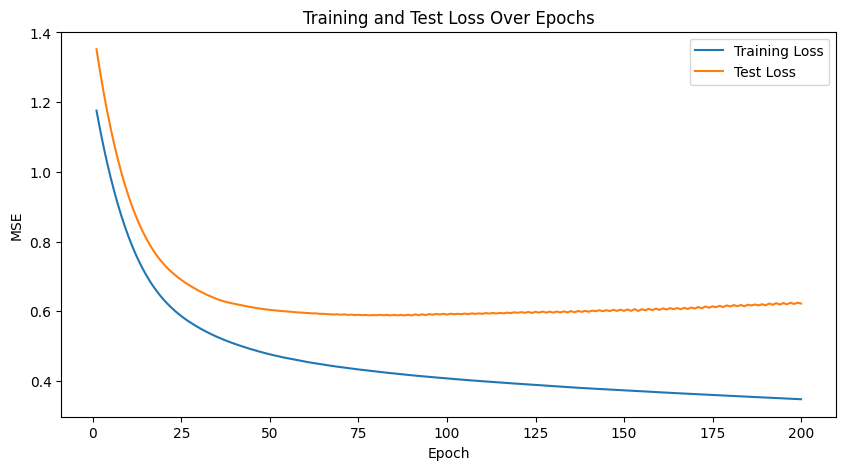

Final Test MSE: 0.6224701491732473


In [31]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.fit(X_train_scaled, y_train_scaled)
    
    # Predict on training and testing set
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate MSE for both training and testing sets
    train_mse = mean_squared_error(y_train_scaled, y_train_pred)
    test_mse = mean_squared_error(y_test_scaled, y_test_pred)
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')

In [32]:
df = pd.read_csv('../../Datasets/study_213/top_5_213.csv', usecols=['DATE', '7058', '8572', '39601', '8901', '7730'])
print(df)

            DATE    7058   8572  39601   8901   7730
0     1963-11-14  1531.0  422.0   19.0  164.0    2.0
1     1963-12-10   437.0   94.0   17.0   97.0    1.0
2     1964-10-25   189.0   66.0   36.0   23.0  761.0
3     1964-10-29   370.0  116.0   83.0  196.0  561.0
4     1964-12-04   101.0    5.0   21.0  233.0    2.0
...          ...     ...    ...    ...    ...    ...
1510  2008-10-28   255.0   16.0  185.0   44.0   15.0
1511  2008-10-30   741.0  735.0  252.0   87.0  382.0
1512  2008-11-03   287.0  291.0   14.0   16.0    1.0
1513  2008-11-04   732.0  468.0   32.0  186.0    1.0
1514  2008-11-08    78.0    3.0  471.0    1.0   14.0

[1515 rows x 6 columns]


In [33]:
for col in ['7058', '8572', '39601', '8901', '7730']:
    df[f'{col}_lag1'] = df[col].shift(1)

"""
7058 ['Merluccius bilinearis']  Silver hake             -> Silver hake, Spiny dogfish, Longfin inshore squid, Red hake, American butterfish
8572 ['Squalus acanthias']      Spiny dogfish           -> Silver hake, Spiny dogfish, Longfin inshore squid, Red hake, American butterfish
39601 ['Doryteuthis pealeii']   Longfin inshore squid   -> Silver hake, Longfin inshore squid
8901 ['Urophycis chuss']        Red hake                -> Silver hake, Longfin inshore squid, Red hake, American butterfish
7730 ['Peprilus triacanthus']   American butterfish     -> Longfin inshore squid
"""

# 7058 ['Merluccius bilinearis']  Silver hake -> Silver hake, Spiny dogfish, Longfin inshore squid, Red hake, American butterfish
df['7058_on_7058'] = df['7058_lag1'] * df['7058']
df['7058_on_8572'] = df['7058_lag1'] * df['8572']
df['7058_on_39601'] = df['7058_lag1'] * df['39601']
df['7058_on_8901'] = df['7058_lag1'] * df['8901']
df['7058_on_7730'] = df['7058_lag1'] * df['7730']

# 8572 ['Squalus acanthias']  Spiny dogfish -> Silver hake, Spiny dogfish, Longfin inshore squid, Red hake, American butterfish
df['8572_on_7058'] = df['8572_lag1'] * df['7058']
df['8572_on_8572'] = df['8572_lag1'] * df['8572']
df['8572_on_39601'] = df['8572_lag1'] * df['39601']
df['8572_on_8901'] = df['8572_lag1'] * df['8901']
df['8572_on_7730'] = df['8572_lag1'] * df['7730']

# 39601 ['Doryteuthis pealeii']  Longfin inshore squid -> Silver hake, Longfin inshore squid
df['39601_on_7058'] = df['39601_lag1'] * df['7058']
df['39601_on_39601'] = df['39601_lag1'] * df['39601']

# 8901 ['Urophycis chuss']  Red hake -> Silver hake, Longfin inshore squid, Red hake, American butterfish
df['8901_on_7058'] = df['8901_lag1'] * df['7058']
df['8901_on_39601'] = df['8901_lag1'] * df['39601']
df['8901_on_8901'] = df['8901_lag1'] * df['8901']
df['8901_on_7730'] = df['8901_lag1'] * df['7730']

# 7730 ['Peprilus triacanthus']  American butterfish -> Longfin inshore squid
df['7730_on_39601'] = df['7730_lag1'] * df['39601']


df.dropna(inplace=True)
print(df)

            DATE   7058   8572  39601   8901   7730  7058_lag1  8572_lag1  \
1     1963-12-10  437.0   94.0   17.0   97.0    1.0     1531.0      422.0   
2     1964-10-25  189.0   66.0   36.0   23.0  761.0      437.0       94.0   
3     1964-10-29  370.0  116.0   83.0  196.0  561.0      189.0       66.0   
4     1964-12-04  101.0    5.0   21.0  233.0    2.0      370.0      116.0   
5     1965-10-31  131.0   22.0  798.0   58.0    1.0      101.0        5.0   
...          ...    ...    ...    ...    ...    ...        ...        ...   
1510  2008-10-28  255.0   16.0  185.0   44.0   15.0      249.0      469.0   
1511  2008-10-30  741.0  735.0  252.0   87.0  382.0      255.0       16.0   
1512  2008-11-03  287.0  291.0   14.0   16.0    1.0      741.0      735.0   
1513  2008-11-04  732.0  468.0   32.0  186.0    1.0      287.0      291.0   
1514  2008-11-08   78.0    3.0  471.0    1.0   14.0      732.0      468.0   

      39601_lag1  8901_lag1  ...  8572_on_39601  8572_on_8901  8572_on_7730

In [34]:
X = df.drop(['DATE', '7058', '8572', '39601', '8901', '7730'], axis=1)
y = df[['7058', '8572', '39601', '8901', '7730']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y)

      7058_lag1  8572_lag1  39601_lag1  8901_lag1  7730_lag1  7058_on_7058  \
870       644.0      680.0      7728.0      199.0      466.0      217028.0   
1280        4.0      555.0       299.0        1.0       93.0          56.0   
1334      430.0      446.0       976.0      227.0      106.0       13330.0   
602       277.0      127.0      3183.0       17.0     4934.0       42935.0   
591       268.0      377.0      1110.0       12.0       23.0       84956.0   
...         ...        ...         ...        ...        ...           ...   
1131       24.0      495.0      5247.0       10.0      529.0          96.0   
1295       13.0        2.0       234.0      131.0      304.0          39.0   
861       487.0      438.0         1.0       33.0        1.0       11201.0   
1460        6.0        7.0       353.0        7.0       42.0         174.0   
1127     1776.0      462.0         1.0       85.0        4.0       55056.0   

      7058_on_8572  7058_on_39601  7058_on_8901  7058_on_7730  

In [35]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1, warm_start=True, random_state=42)

Epoch 1/200, Training MSE: 1.1129, Test MSE: 1.1946
Epoch 2/200, Training MSE: 0.9335, Test MSE: 0.9441


Epoch 3/200, Training MSE: 0.7992, Test MSE: 0.8008
Epoch 4/200, Training MSE: 0.6987, Test MSE: 0.7308
Epoch 5/200, Training MSE: 0.6250, Test MSE: 0.7128
Epoch 6/200, Training MSE: 0.5715, Test MSE: 0.7274
Epoch 7/200, Training MSE: 0.5319, Test MSE: 0.7579
Epoch 8/200, Training MSE: 0.5016, Test MSE: 0.7921


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 9/200, Training MSE: 0.4773, Test MSE: 0.8322
Epoch 10/200, Training MSE: 0.4570, Test MSE: 0.8648
Epoch 11/200, Training MSE: 0.4392, Test MSE: 0.8901
Epoch 12/200, Training MSE: 0.4233, Test MSE: 0.9099
Epoch 13/200, Training MSE: 0.4086, Test MSE: 0.9223
Epoch 14/200, Training MSE: 0.3950, Test MSE: 0.9299
Epoch 15/200, Training MSE: 0.3822, Test MSE: 0.9358
Epoch 16/200, Training MSE: 0.3700, Test MSE: 0.9328
Epoch 17/200, Training MSE: 0.3589, Test MSE: 0.9292
Epoch 18/200, Training MSE: 0.3482, Test MSE: 0.9252
Epoch 19/200, Training MSE: 0.3383, Test MSE: 0.9208
Epoch 20/200, Training MSE: 0.3289, Test MSE: 0.9074
Epoch 21/200, Training MSE: 0.3201, Test MSE: 0.8983
Epoch 22/200, Training MSE: 0.3116, Test MSE: 0.8902
Epoch 23/200, Training MSE: 0.3035, Test MSE: 0.8805
Epoch 24/200, Training MSE: 0.2960, Test MSE: 0.8709
Epoch 25/200, Training MSE: 0.2890, Test MSE: 0.8633
Epoch 26/200, Training MSE: 0.2824, Test MSE: 0.8554
Epoch 27/200, Training MSE: 0.2761, Test MSE: 0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 32/200, Training MSE: 0.2497, Test MSE: 0.8097
Epoch 33/200, Training MSE: 0.2454, Test MSE: 0.8077
Epoch 34/200, Training MSE: 0.2415, Test MSE: 0.7991
Epoch 35/200, Training MSE: 0.2376, Test MSE: 0.7959
Epoch 36/200, Training MSE: 0.2340, Test MSE: 0.7902
Epoch 37/200, Training MSE: 0.2306, Test MSE: 0.7846
Epoch 38/200, Training MSE: 0.2274, Test MSE: 0.7805
Epoch 39/200, Training MSE: 0.2242, Test MSE: 0.7732
Epoch 40/200, Training MSE: 0.2214, Test MSE: 0.7762
Epoch 41/200, Training MSE: 0.2185, Test MSE: 0.7736
Epoch 42/200, Training MSE: 0.2159, Test MSE: 0.7744
Epoch 43/200, Training MSE: 0.2133, Test MSE: 0.7736
Epoch 44/200, Training MSE: 0.2109, Test MSE: 0.7728
Epoch 45/200, Training MSE: 0.2086, Test MSE: 0.7764
Epoch 46/200, Training MSE: 0.2064, Test MSE: 0.7721
Epoch 47/200, Training MSE: 0.2042, Test MSE: 0.7743
Epoch 48/200, Training MSE: 0.2020, Test MSE: 0.7694
Epoch 49/200, Training MSE: 0.2000, Test MSE: 0.7726
Epoch 50/200, Training MSE: 0.1979, Test MSE: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 54/200, Training MSE: 0.1899, Test MSE: 0.7654
Epoch 55/200, Training MSE: 0.1882, Test MSE: 0.7671
Epoch 56/200, Training MSE: 0.1863, Test MSE: 0.7641
Epoch 57/200, Training MSE: 0.1845, Test MSE: 0.7660
Epoch 58/200, Training MSE: 0.1827, Test MSE: 0.7570
Epoch 59/200, Training MSE: 0.1812, Test MSE: 0.7610
Epoch 60/200, Training MSE: 0.1796, Test MSE: 0.7593
Epoch 61/200, Training MSE: 0.1780, Test MSE: 0.7564
Epoch 62/200, Training MSE: 0.1765, Test MSE: 0.7540
Epoch 63/200, Training MSE: 0.1750, Test MSE: 0.7565
Epoch 64/200, Training MSE: 0.1732, Test MSE: 0.7539
Epoch 65/200, Training MSE: 0.1717, Test MSE: 0.7576
Epoch 66/200, Training MSE: 0.1703, Test MSE: 0.7551
Epoch 67/200, Training MSE: 0.1689, Test MSE: 0.7585
Epoch 68/200, Training MSE: 0.1675, Test MSE: 0.7520
Epoch 69/200, Training MSE: 0.1659, Test MSE: 0.7582
Epoch 70/200, Training MSE: 0.1648, Test MSE: 0.7562


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 71/200, Training MSE: 0.1634, Test MSE: 0.7561
Epoch 72/200, Training MSE: 0.1621, Test MSE: 0.7554
Epoch 73/200, Training MSE: 0.1609, Test MSE: 0.7562
Epoch 74/200, Training MSE: 0.1597, Test MSE: 0.7562
Epoch 75/200, Training MSE: 0.1584, Test MSE: 0.7568
Epoch 76/200, Training MSE: 0.1572, Test MSE: 0.7539
Epoch 77/200, Training MSE: 0.1561, Test MSE: 0.7598
Epoch 78/200, Training MSE: 0.1551, Test MSE: 0.7612
Epoch 79/200, Training MSE: 0.1540, Test MSE: 0.7576
Epoch 80/200, Training MSE: 0.1528, Test MSE: 0.7584
Epoch 81/200, Training MSE: 0.1519, Test MSE: 0.7605
Epoch 82/200, Training MSE: 0.1507, Test MSE: 0.7530
Epoch 83/200, Training MSE: 0.1499, Test MSE: 0.7572
Epoch 84/200, Training MSE: 0.1488, Test MSE: 0.7590
Epoch 85/200, Training MSE: 0.1480, Test MSE: 0.7554
Epoch 86/200, Training MSE: 0.1470, Test MSE: 0.7560
Epoch 87/200, Training MSE: 0.1461, Test MSE: 0.7582
Epoch 88/200, Training MSE: 0.1451, Test MSE: 0.7536
Epoch 89/200, Training MSE: 0.1442, Test MSE: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 92/200, Training MSE: 0.1414, Test MSE: 0.7577
Epoch 93/200, Training MSE: 0.1405, Test MSE: 0.7560
Epoch 94/200, Training MSE: 0.1397, Test MSE: 0.7628
Epoch 95/200, Training MSE: 0.1389, Test MSE: 0.7574
Epoch 96/200, Training MSE: 0.1379, Test MSE: 0.7623
Epoch 97/200, Training MSE: 0.1371, Test MSE: 0.7610
Epoch 98/200, Training MSE: 0.1363, Test MSE: 0.7625
Epoch 99/200, Training MSE: 0.1356, Test MSE: 0.7635
Epoch 100/200, Training MSE: 0.1347, Test MSE: 0.7685
Epoch 101/200, Training MSE: 0.1341, Test MSE: 0.7718
Epoch 102/200, Training MSE: 0.1333, Test MSE: 0.7697
Epoch 103/200, Training MSE: 0.1326, Test MSE: 0.7688
Epoch 104/200, Training MSE: 0.1319, Test MSE: 0.7774
Epoch 105/200, Training MSE: 0.1312, Test MSE: 0.7786
Epoch 106/200, Training MSE: 0.1306, Test MSE: 0.7787
Epoch 107/200, Training MSE: 0.1300, Test MSE: 0.7809
Epoch 108/200, Training MSE: 0.1295, Test MSE: 0.7793
Epoch 109/200, Training MSE: 0.1289, Test MSE: 0.7874
Epoch 110/200, Training MSE: 0.1282,

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 116/200, Training MSE: 0.1245, Test MSE: 0.7961
Epoch 117/200, Training MSE: 0.1240, Test MSE: 0.7938
Epoch 118/200, Training MSE: 0.1232, Test MSE: 0.8000
Epoch 119/200, Training MSE: 0.1228, Test MSE: 0.8000
Epoch 120/200, Training MSE: 0.1220, Test MSE: 0.8028
Epoch 121/200, Training MSE: 0.1217, Test MSE: 0.8004
Epoch 122/200, Training MSE: 0.1208, Test MSE: 0.8115
Epoch 123/200, Training MSE: 0.1205, Test MSE: 0.8133
Epoch 124/200, Training MSE: 0.1195, Test MSE: 0.8066
Epoch 125/200, Training MSE: 0.1192, Test MSE: 0.8142
Epoch 126/200, Training MSE: 0.1184, Test MSE: 0.8128
Epoch 127/200, Training MSE: 0.1181, Test MSE: 0.8156
Epoch 128/200, Training MSE: 0.1173, Test MSE: 0.8142
Epoch 129/200, Training MSE: 0.1170, Test MSE: 0.8194
Epoch 130/200, Training MSE: 0.1165, Test MSE: 0.8181
Epoch 131/200, Training MSE: 0.1159, Test MSE: 0.8241
Epoch 132/200, Training MSE: 0.1154, Test MSE: 0.8146
Epoch 133/200, Training MSE: 0.1149, Test MSE: 0.8261
Epoch 134/200, Training MSE:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 142/200, Training MSE: 0.1106, Test MSE: 0.8340
Epoch 143/200, Training MSE: 0.1101, Test MSE: 0.8342
Epoch 144/200, Training MSE: 0.1098, Test MSE: 0.8413
Epoch 145/200, Training MSE: 0.1092, Test MSE: 0.8385
Epoch 146/200, Training MSE: 0.1089, Test MSE: 0.8418
Epoch 147/200, Training MSE: 0.1084, Test MSE: 0.8421
Epoch 148/200, Training MSE: 0.1081, Test MSE: 0.8422
Epoch 149/200, Training MSE: 0.1077, Test MSE: 0.8474
Epoch 150/200, Training MSE: 0.1074, Test MSE: 0.8527
Epoch 151/200, Training MSE: 0.1071, Test MSE: 0.8556
Epoch 152/200, Training MSE: 0.1067, Test MSE: 0.8545
Epoch 153/200, Training MSE: 0.1064, Test MSE: 0.8619
Epoch 154/200, Training MSE: 0.1060, Test MSE: 0.8562
Epoch 155/200, Training MSE: 0.1056, Test MSE: 0.8700
Epoch 156/200, Training MSE: 0.1053, Test MSE: 0.8642
Epoch 157/200, Training MSE: 0.1046, Test MSE: 0.8705


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 158/200, Training MSE: 0.1045, Test MSE: 0.8658
Epoch 159/200, Training MSE: 0.1039, Test MSE: 0.8739
Epoch 160/200, Training MSE: 0.1037, Test MSE: 0.8699
Epoch 161/200, Training MSE: 0.1032, Test MSE: 0.8755
Epoch 162/200, Training MSE: 0.1030, Test MSE: 0.8754
Epoch 163/200, Training MSE: 0.1025, Test MSE: 0.8805
Epoch 164/200, Training MSE: 0.1023, Test MSE: 0.8859
Epoch 165/200, Training MSE: 0.1018, Test MSE: 0.8812
Epoch 166/200, Training MSE: 0.1015, Test MSE: 0.8889
Epoch 167/200, Training MSE: 0.1011, Test MSE: 0.8894
Epoch 168/200, Training MSE: 0.1008, Test MSE: 0.8925
Epoch 169/200, Training MSE: 0.1004, Test MSE: 0.8910
Epoch 170/200, Training MSE: 0.1002, Test MSE: 0.8953
Epoch 171/200, Training MSE: 0.0998, Test MSE: 0.8989
Epoch 172/200, Training MSE: 0.0994, Test MSE: 0.9066
Epoch 173/200, Training MSE: 0.0991, Test MSE: 0.9049
Epoch 174/200, Training MSE: 0.0989, Test MSE: 0.9094
Epoch 175/200, Training MSE: 0.0985, Test MSE: 0.9100
Epoch 176/200, Training MSE:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 179/200, Training MSE: 0.0974, Test MSE: 0.9227
Epoch 180/200, Training MSE: 0.0971, Test MSE: 0.9260
Epoch 181/200, Training MSE: 0.0969, Test MSE: 0.9290
Epoch 182/200, Training MSE: 0.0965, Test MSE: 0.9289
Epoch 183/200, Training MSE: 0.0965, Test MSE: 0.9360
Epoch 184/200, Training MSE: 0.0961, Test MSE: 0.9319
Epoch 185/200, Training MSE: 0.0959, Test MSE: 0.9459
Epoch 186/200, Training MSE: 0.0956, Test MSE: 0.9384
Epoch 187/200, Training MSE: 0.0955, Test MSE: 0.9485
Epoch 188/200, Training MSE: 0.0952, Test MSE: 0.9467
Epoch 189/200, Training MSE: 0.0952, Test MSE: 0.9531
Epoch 190/200, Training MSE: 0.0949, Test MSE: 0.9458
Epoch 191/200, Training MSE: 0.0947, Test MSE: 0.9568
Epoch 192/200, Training MSE: 0.0944, Test MSE: 0.9471
Epoch 193/200, Training MSE: 0.0941, Test MSE: 0.9606
Epoch 194/200, Training MSE: 0.0939, Test MSE: 0.9514
Epoch 195/200, Training MSE: 0.0936, Test MSE: 0.9630
Epoch 196/200, Training MSE: 0.0934, Test MSE: 0.9546
Epoch 197/200, Training MSE:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

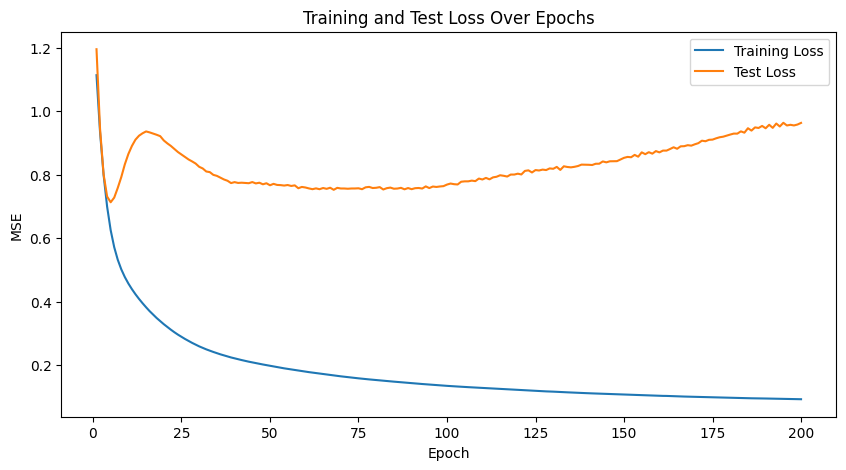

Final Test MSE: 0.9626741762993625


In [36]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.fit(X_train_scaled, y_train_scaled)
    
    # Predict on training and testing set
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate MSE for both training and testing sets
    train_mse = mean_squared_error(y_train_scaled, y_train_pred)
    test_mse = mean_squared_error(y_test_scaled, y_test_pred)
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')